<class 'numpy.ndarray'>
(12, 505)


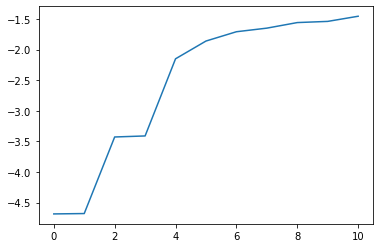

In [9]:
import numpy as np
from pySingularSpectrumAnalysis import SingularSpectrumAnalysis

from statsmodels.datasets import co2
import matplotlib.pyplot as plt

data = co2.load(True).data
data = data.resample('M').mean().ffill()
data = data.values.flatten()[10:]

print(type(data))
ssa = SingularSpectrumAnalysis(L=12)
comps = ssa.decomposition(data)
# plt.plot(comps[:, 1:])
lgsigma = np.log(ssa.sigma)

plt.plot(np.cumsum(lgsigma)[:-1] - np.cumsum(lgsigma)[1:])